In [1]:
using Distributions, StatsPlots, StatsBase

In [2]:
using RCall

@rimport base as R
R.Sys_setenv(LANG = "en")

@rimport stats as stats
@rlibrary exact2x2
@rlibrary exactci

In [3]:
using SymPy: @vars, expand, sympy
@vars a b c d ω δ positive=true
expr = (a-δ)*(d-δ) - ω*(b+δ)*(c+δ)
sympy.Poly(expand(expr), δ)

Poly((1 - ω)*δ**2 + (-a - b*ω - c*ω - d)*δ + a*d - b*c*ω, δ, domain='ZZ[a,b,c,
d,ω]')

In [4]:
function pval_chisq(a, b, c, d, ω)
    A = 1 - ω
    B = a + d + ω*(b + c)
    C = a*d - ω*b*c
    δ = 2C/(B + √(B^2 - 4A*C))
    χ² = δ^2 * (1/(a-δ) + 1/(b+δ) + 1/(c+δ) + 1/(d-δ))
    ccdf(Chisq(1), χ²)
end

pval_chisq (generic function with 1 method)

[a b; c d] = [5 20; 11 14]
pval_bayes(1.0) = 0.06664599999999998
pval_chisq(a, b, c, d, 1.0) = 0.0689088078862699


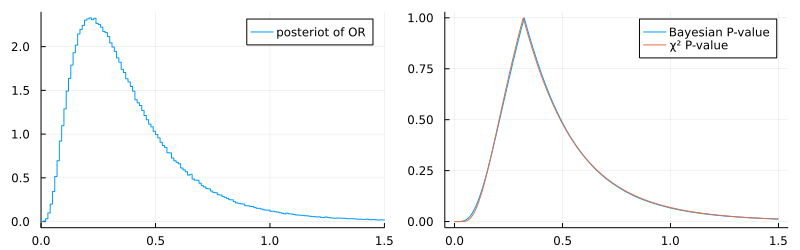

In [5]:
α, β = 0.5, 0.5
a, b, c, d = 5, 20, 11, 14
beta1 = Beta(α + a, β + b)
beta2 = Beta(α + c, β + d)
L = 10^6
R1 = rand(beta1, L)
R2 = rand(beta2, L)
OR = @. R1/(1-R1)/(R2/(1-R2))
ecdf_OR = ecdf(OR)
pval_bayes(x) = min(1, 2ecdf_OR(x), 2 - 2ecdf_OR(x))

P1 = stephist(OR; norm=true, xlim=(0.0, 1.5), label="posteriot of OR")
P2 = plot(x -> pval_bayes(x), 0.0, 1.5; label="Bayesian P-value")
plot!(x -> pval_chisq(a, b, c, d, x); label="χ² P-value")

@show [a b; c d]
@show pval_bayes(1.0)
@show pval_chisq(a, b, c, d, 1.0)

plot(P1, P2; size=(800, 250))

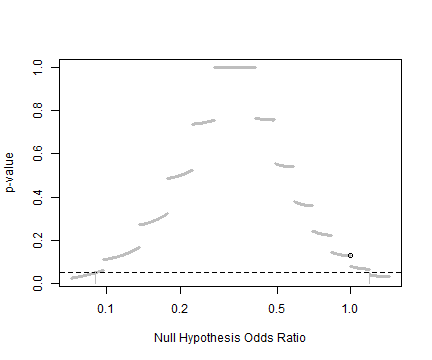

RObject{VecSxp}

	Two-sided Fisher's Exact Test (usual method using minimum likelihood)

data:  structure(c(5L, 11L, 20L, 14L), dim = c(2L, 2L))
p-value = 0.1284
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0899 1.2008
sample estimates:
odds ratio 
 0.3257792 



In [6]:
exact2x2([a b; c d]; plot=true)

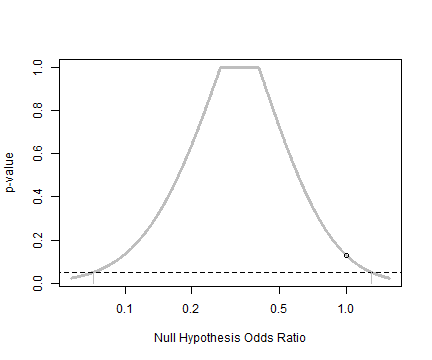

RObject{VecSxp}

	Central Fisher's Exact Test

data:  structure(c(5L, 11L, 20L, 14L), dim = c(2L, 2L))
p-value = 0.1284
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.07166325 1.29736673
sample estimates:
odds ratio 
 0.3257792 



In [7]:
exact2x2([a b; c d]; plot=true, tsmethod="central")

In [8]:
stats.chisq_test([a b; c d]; correct=true)

RObject{VecSxp}

	Pearson's Chi-squared test with Yates' continuity correction

data:  structure(c(5L, 11L, 20L, 14L), dim = c(2L, 2L))
X-squared = 2.2978, df = 1, p-value = 0.1296



In [9]:
stats.chisq_test([a b; c d]; correct=false)

RObject{VecSxp}

	Pearson's Chi-squared test

data:  structure(c(5L, 11L, 20L, 14L), dim = c(2L, 2L))
X-squared = 3.3088, df = 1, p-value = 0.06891

